In [1]:
import pandas as pd
datos = pd.read_csv("U5_02_housing.csv")

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

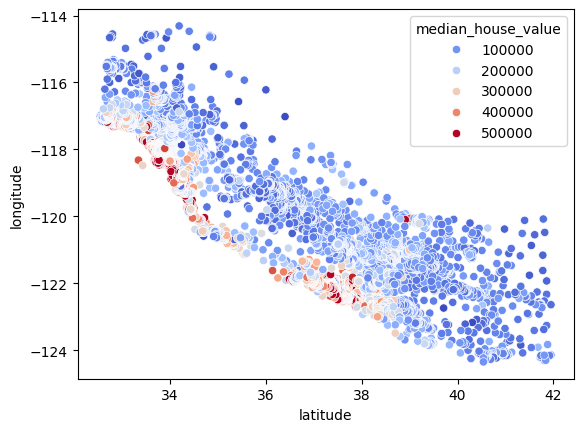

In [3]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")

TypeError: cannot convert the series to <class 'float'>

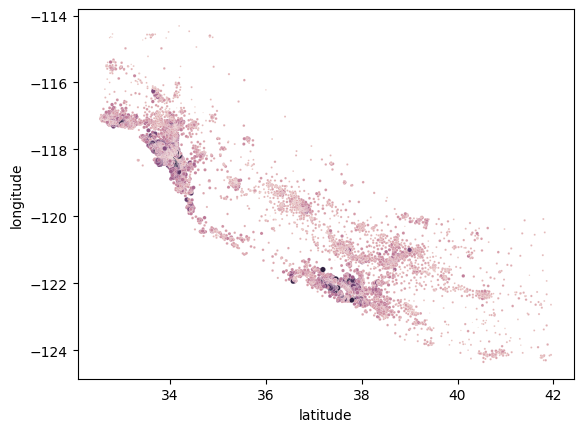

In [34]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", 
               s=datos["median_income"])

In [17]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
datos.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [45]:
from sklearn.cluster import KMeans

X = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters = 6)
predicciones = modelo.fit_predict(X)

In [46]:
predicciones.shape

(20640,)

In [47]:
X["segmento_economico"] = predicciones

In [48]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,3
1,37.86,-122.22,8.3014,3
2,37.85,-122.24,7.2574,3
3,37.85,-122.25,5.6431,3
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [49]:
X["segmento_economico"].value_counts()

segmento_economico
0    6620
1    4875
4    4162
3    2771
5    1677
2     535
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

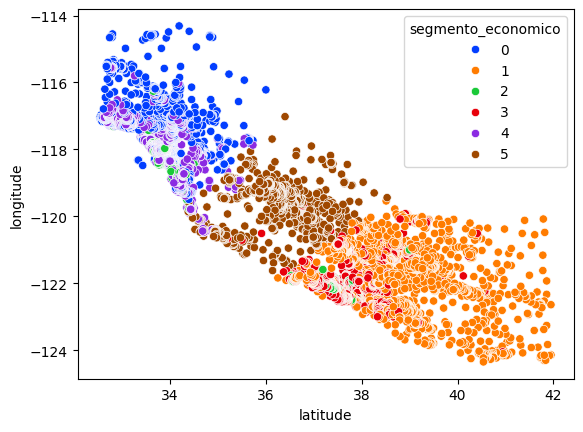

In [51]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="bright")

C:\Users\HP\AppData\Local\Temp\ipykernel_10388\809623068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="segmento_economico", data=X, palette="bright")


<Axes: xlabel='segmento_economico', ylabel='count'>

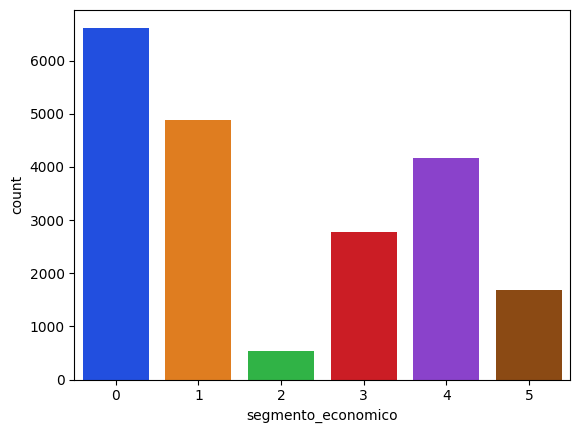

In [58]:
sb.countplot(x="segmento_economico", data=X, palette="bright")

In [59]:
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     2.799299
1     2.822327
2    10.563325
3     5.518715
4     5.332638
5     2.660862
Name: median_income, dtype: float64